# Lab 04 - Logica Fuzzy

In [1]:
# Importa as bibliotecas necessarias
%pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Definindo as variaveis

#Variaveis de Entrada (Antecedent)
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

#Variaveis de saída (Consequent)
gorjeta = ctrl.Consequent(np.arange(0, 31, 1), 'gorjeta')

## Conjunto Fuzzy

c:\Users\AlvaroCJesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


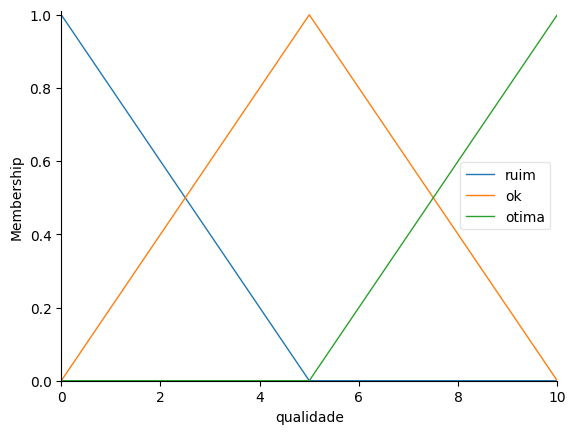

In [3]:
# automf -> Atribuicao de categorias automaticamente
qualidade.automf(names=['ruim', 'ok', 'otima'])
servico.automf(names=['ruim','medio','bom'])
qualidade.view()

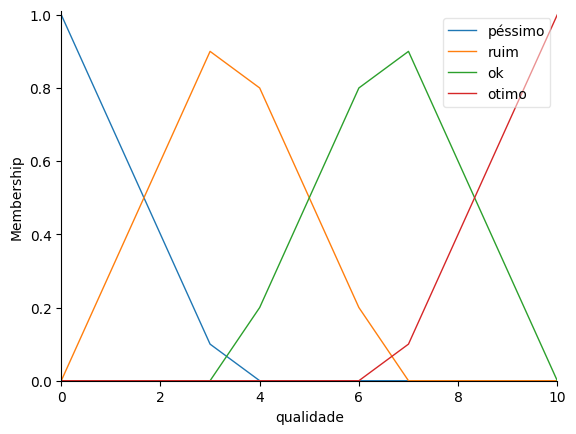

In [9]:
# automf -> Atribuicao de categorias automaticamente
qualidade.automf(names=['péssimo', 'ruim', 'ok', 'otimo'])
qualidade.view()

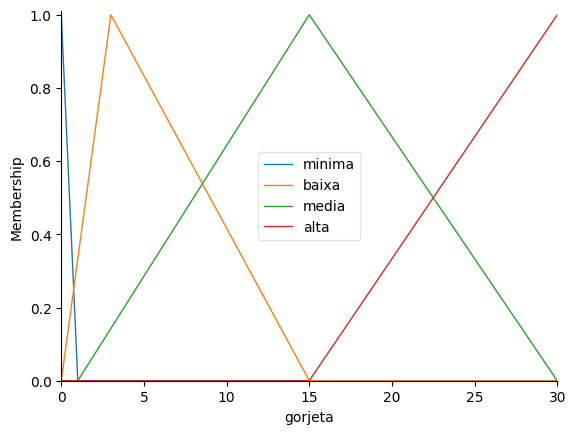

In [10]:
# sem o automf -> Triangular
gorjeta['minima'] = fuzz.trimf(gorjeta.universe, [-1,0,1])
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0,3,15])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [1,15,30])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15,30,45])
gorjeta.view()

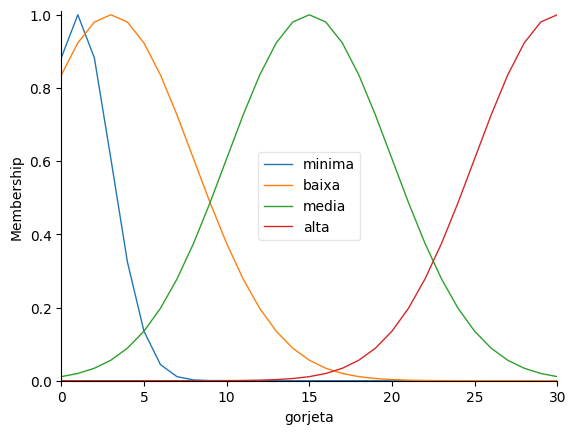

In [11]:
# sem o automf -> guassiana
gorjeta['minima'] = fuzz.gaussmf(gorjeta.universe, 1, 2)
gorjeta['baixa'] = fuzz.gaussmf(gorjeta.universe, 3, 5)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 15, 5)
gorjeta['alta'] = fuzz.gaussmf(gorjeta.universe, 30, 5)
gorjeta.view()

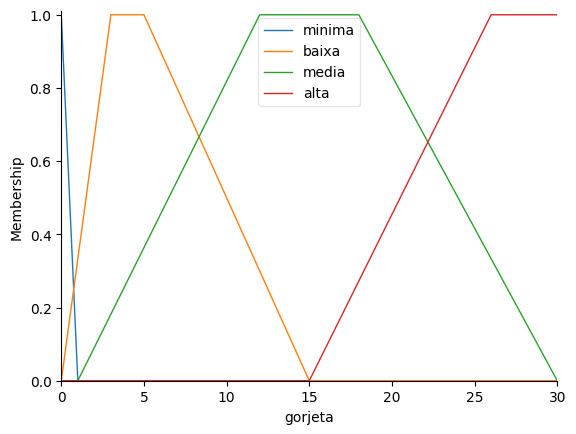

In [12]:
# sem o automf -> trapezio
gorjeta['minima'] = fuzz.trapmf(gorjeta.universe, [-1, 0, 0, 1])
gorjeta['baixa'] = fuzz.trapmf(gorjeta.universe, [0, 3, 5, 15])
gorjeta['media'] = fuzz.trapmf(gorjeta.universe, [1, 12, 18, 30])
gorjeta['alta'] = fuzz.trapmf(gorjeta.universe, [15, 26, 30, 45])
gorjeta.view()

## Criando as regras

In [13]:
# Criando as regras
regra_1 = ctrl.Rule(qualidade['ruim'] & servico['ruim'], gorjeta['minima'])
regra_2 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra_3 = ctrl.Rule(servico['medio'], gorjeta['media'])
regra_4 = ctrl.Rule(servico['bom'] | qualidade['otimo'], gorjeta['alta'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4])

## Executando o controlador

17.407851914020608


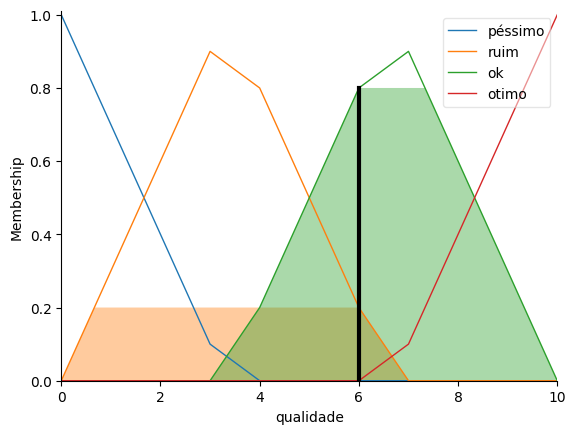

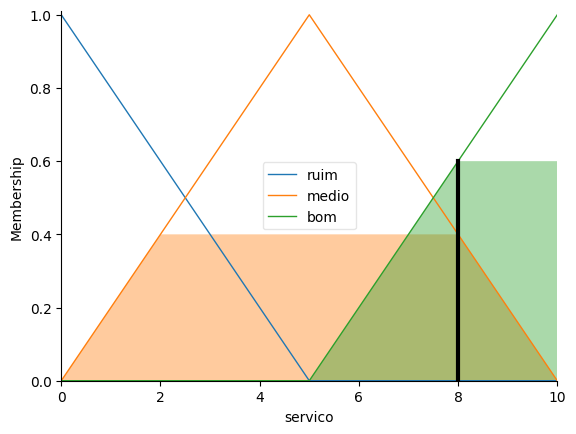

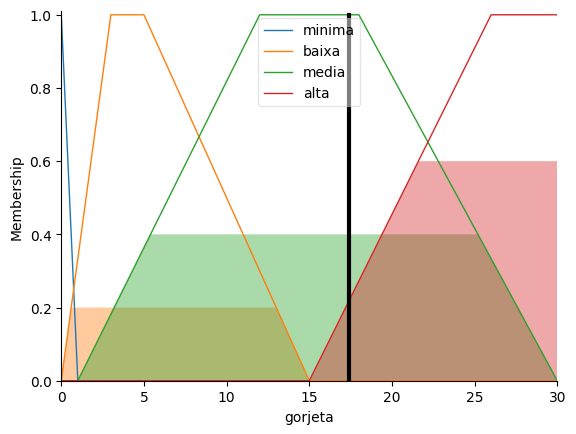

In [17]:
#Simulando
CalculoGorjeta = ctrl.ControlSystemSimulation(controlador)

CalculoGorjeta.input ['qualidade'] = 6
CalculoGorjeta.input ['servico'] = 8

# Crunch the numbers
CalculoGorjeta.compute()

print(CalculoGorjeta.output['gorjeta'])
qualidade.view(sim=CalculoGorjeta)
servico.view(sim=CalculoGorjeta)
gorjeta.view(sim=CalculoGorjeta)

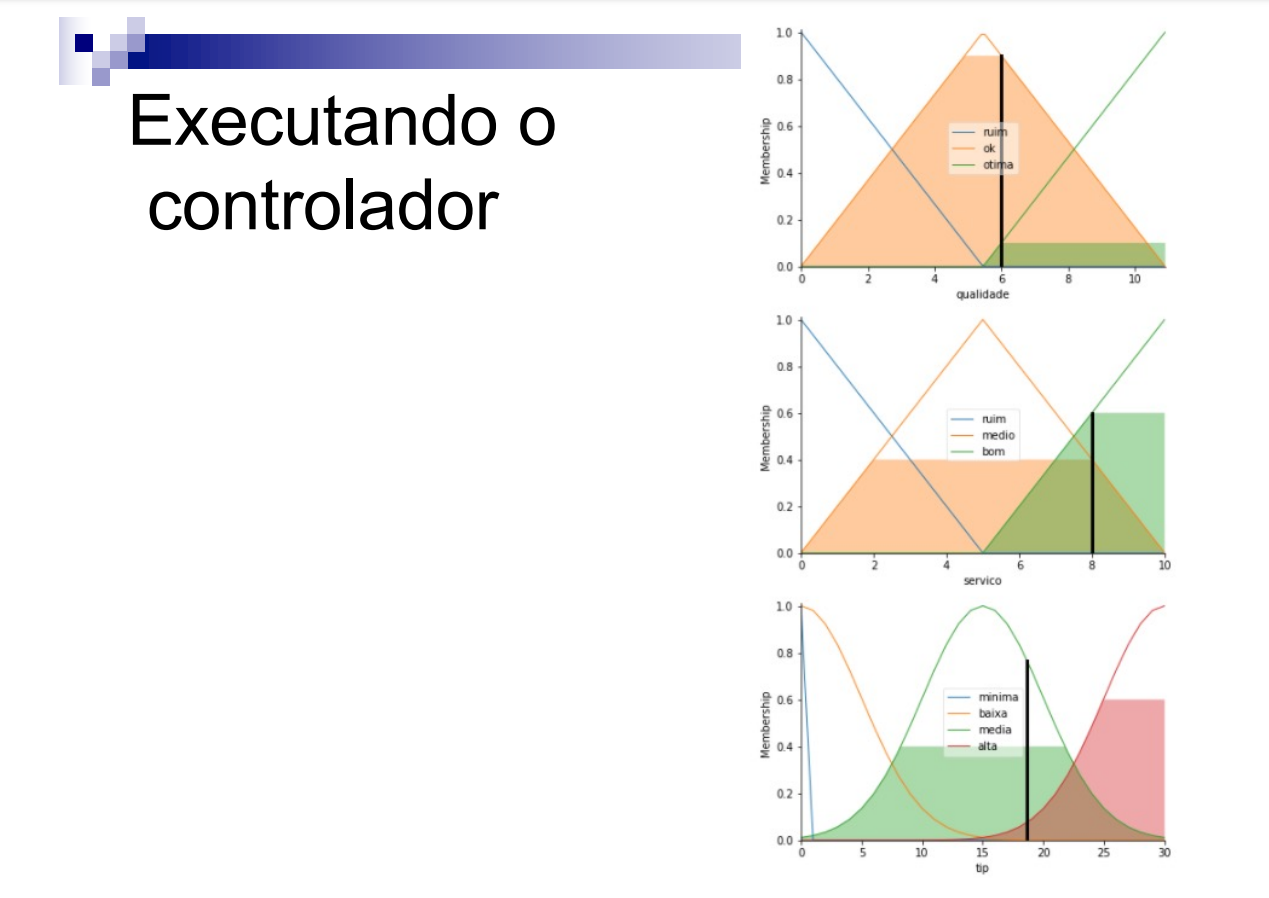